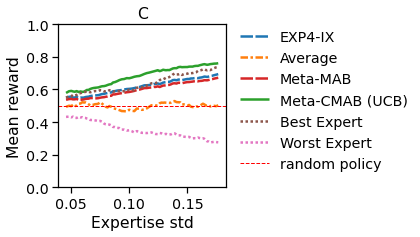

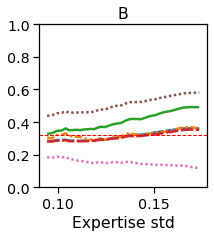

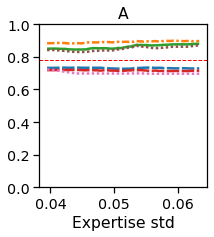

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
output_folder = "figures/"
os.makedirs(output_folder,exist_ok=True)
names_map={'meta':'Meta-CMAB (LinUCB)','ts':'Meta-CMAB (TS)','falcon':'Meta-CMAB (FALCON)','mexpl3':'Meta-CMAB (UCB)','expl3':'EXPL3',
            'cover':'Meta-CMAB (ILTCB)','avg':'Average','scb':'Meta-CMAB (SquareCB)','exp4':'Exp4','mab':'Meta-MAB','random':'random',
          'best expert':'Best Expert','worst expert':'Worst Expert','exp4':'EXP4-IX'}

meta_style = (1,0)
linestyles={'Meta-CMAB (Cover)':(1,0),'Meta-CMAB (TS)':meta_style,'Meta-CMAB (ILTCB)':meta_style,'Meta-CMAB (FALCON)':meta_style,
                'Greedy':(1,0),'Average': (3,1,1,1),'EXP4-IX':(5,1),'Meta-CMAB (UCB)':meta_style,
                'Meta-MAB':(5,1),'Best Expert':(1,1),'Worst Expert':(1,1)}

palette={'Average':'C1','EXP4-IX':'C0', 'Meta-CMAB (ILTCB)':'C4', 'Meta-CMAB (FALCON)':'C6','Meta-MAB':'C3',
        'Meta-CMAB (TS)':'C5',f'Meta-CMAB (UCB)':'C2','Best Expert':'C5','Worst Expert':'C6',
       }
x_label = "Expertise std"

sns.set_context('notebook',font_scale=1.3, rc={"lines.linewidth": 2.5})
for p,dataset_name in enumerate(("dunchenne","trec","snow",)[:]):
    plt.figure(figsize=(3,3))
    print_res = pd.read_csv(dataset_name+"k_results.csv")

    print_res['alg']=print_res['alg'].map(names_map.get)

    
    rolls=[]
    for alg in print_res.alg.unique():
        rolled = (print_res[print_res.alg==alg].sort_values(by=[x_label]).rolling(window=min(print_res['Expertise std'].nunique()-1,20)).mean())
        rolled['alg']=alg
        rolled = rolled[~rolled[x_label].isnull()]
        rolls.append(rolled)
    print_res=pd.concat(rolls)

    print_res = print_res[~print_res.alg.isin(['EXPL3','Meta-CMAB (LinUCB)','Meta-CMAB (SquareCB)','mEXPL3'])]
    print_res = print_res[~print_res.alg.isin(['EXPL3','Meta-CMAB (LinUCB)','Meta-CMAB (FALCON)','Meta-CMAB (ILTCB)','Meta-CMAB (TS)','Meta-CMAB (SquareCB)','mEXPL3'])]

    ax = sns.lineplot(data=print_res[print_res.alg!="random"],style="alg",dashes=linestyles,x=x_label,ci=None,palette=palette,hue="alg",y="Mean reward",legend=p==0)
    
    if dataset_name!="dunchenne": ax.set_ylabel(None)
    random_values = print_res[print_res.alg=="random"].values
    plt.axhline(np.mean(random_values[:,2]),c="red",ls="--",linewidth=1,label="random policy")
    
    if p==0:
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
    plt.title("CBA"[p])
    plt.ylim(0,1)
    plt.savefig("figures/"+dataset_name+"_plot.pdf",bbox_inches='tight')
    plt.show()
    